# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте приложить ссылку на данные). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


In [3]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
rest_df = pd.read_csv('one-star-michelin-restaurants.csv')
# print('region are:',rest_df.region.unique())
# print('city are:',rest_df.city.unique())
print('cuisine are:',rest_df.cuisine.unique())

cuisine are: ['Creative' 'Classic cuisine' 'Market cuisine' 'Modern cuisine' 'Japanese'
 'Vegetarian' 'Contemporary' 'Indian' 'Korean' 'Californian' 'American'
 'International' 'Moroccan' 'Thai' 'Chinese' 'Fusion' 'Italian' 'French'
 'Asian' 'Steakhouse' 'Mexican' 'Gastropub' 'Danish' 'Classic French'
 'Finnish' 'Mediterranean' 'Seafood' 'Cantonese' 'Dim Sum' 'Teppanyaki'
 'Sushi' 'Shanghainese' 'Noodles and congee' 'Innovative'
 'Cantonese Roast Meats' 'Taizhou' 'Sichuan' 'European contemporary'
 'Scandinavian' 'Austrian' 'Spanish' 'Modern British' 'modern'
 'Asian influences' 'creative' 'French contemporary' 'Korean contemporary'
 'Temple cuisine' 'Street Food' 'Fujian' 'Australian'
 'Italian contemporary' 'Barbecue' 'Peranakan' 'Meats and grills'
 'Taiwanese' 'Hang Zhou' 'Asian contemporary' 'Thai Contemporary'
 'Southern Thai' 'European' 'Creative British' 'Traditional British'
 'Regional cuisine' 'Mediterranean cuisine' 'Creative French'
 'Modern French']


<AxesSubplot:title={'center':'Top 10 countries'}, xlabel='countries', ylabel='count'>

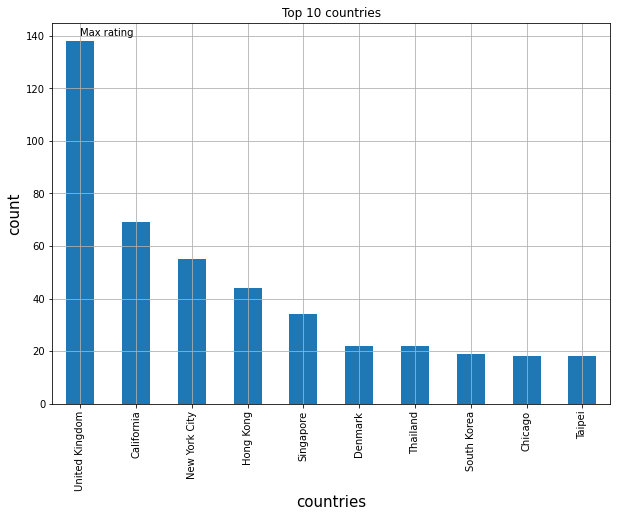

In [7]:
regplt=rest_df.region.value_counts()[:10].plot.bar(title='Top 10 countries')
regplt.set_xlabel('countries',size=15)
regplt.set_ylabel('count',size=15)
regplt.text(0, 140, 'Max rating')
regplt.grid()
regplt
# Топ-10 стран по кол-ву мишленовских ресторанов (с одной звездой). Лидирует UK (138 ресторанов). 

<AxesSubplot:title={'center':'Top 10 cities'}, xlabel='city', ylabel='count'>

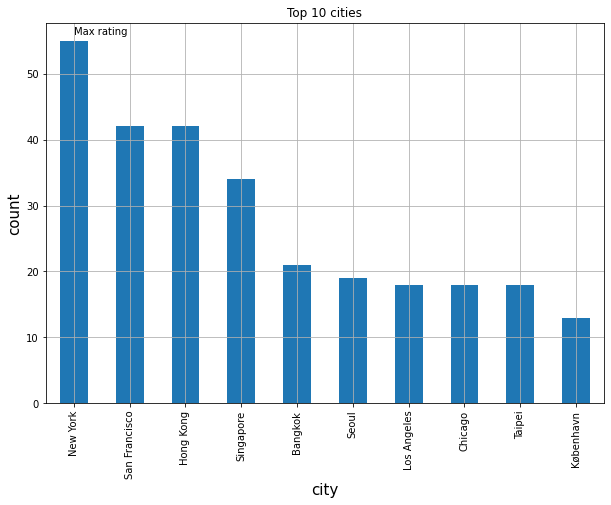

In [8]:
cityplt=rest_df.city.value_counts()[:10].plot.bar(title='Top 10 cities')
cityplt.set_xlabel('city',size=15)
cityplt.set_ylabel('count',size=15)
cityplt.text(0, 56, 'Max rating')
cityplt.grid()
cityplt
# Топ-10 городов по кол-ву мишленовских ресторанов (с одной звездой). Лидирует NYK. Около 55 ресторанов. 
# Сан-Франциско и  Гонконг и  на 2-м месте.

<AxesSubplot:title={'center':'Top 10 cuisine'}, xlabel='cuisine', ylabel='count'>

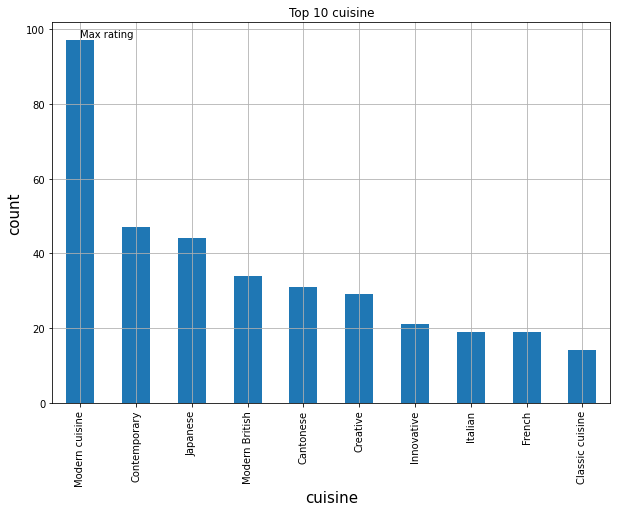

In [9]:
cuis_plt=rest_df.cuisine.value_counts()[:10].plot.bar(title='Top 10 cuisine')
cuis_plt.set_xlabel('cuisine',size=15)
cuis_plt.set_ylabel('count',size=15)
cuis_plt.text(0, 98, 'Max rating')
cuis_plt.grid()
cuis_plt
# Топ-10 мировых кухонь представленных в мишленовских ресторанах (с одной звездой). В лидерах Modern Cuisine.

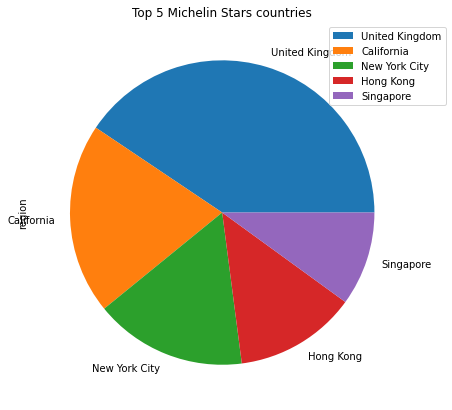

In [12]:
# Топ-5 стран по кол-ву мишленовских ресторанов 
regplt=rest_df.region.value_counts()[:5].plot(kind='pie', title='Top 5 Michelin Stars countries')
plt.legend(bbox_to_anchor=(0.6, .5, 0.5, 0.5))


Далее попробовал визуализировать гистограмму с накоплением, но она не получилась.
Тепловая карта не подходит, как инструмент визуализации.

In [14]:
rest_df = pd.read_csv('one-star-michelin-restaurants.csv')
reg_cuis = rest_df.loc[:, ['region', 'cuisine']]
# reg_cuis.head()

svod = reg_cuis.groupby('region').agg(['value_counts'])['cuisine'].reset_index()
# svod

<AxesSubplot:>

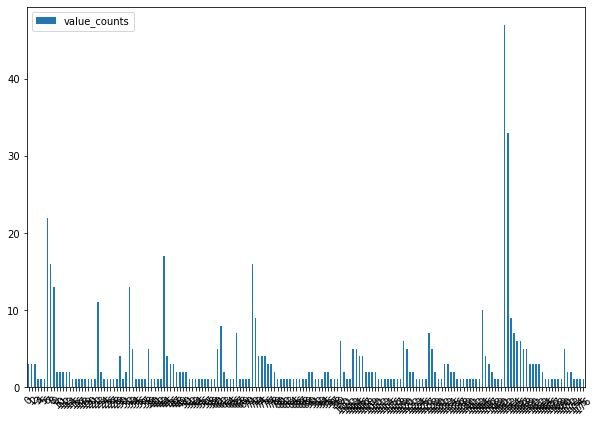

In [15]:
svod[list(filter(lambda x: x == 'value_counts', svod.columns))].plot(kind='bar', rot=45, stacked=True)

In [16]:
pivot_ = svod.pivot_table(index = 'region', columns = 'cuisine', values = 'value_counts', aggfunc = 'count', fill_value = 0)
pivot_.tail()


cuisine,American,Asian,Asian contemporary,Asian influences,Australian,Austrian,Barbecue,Californian,Cantonese,Cantonese Roast Meats,...,Taiwanese,Taizhou,Temple cuisine,Teppanyaki,Thai,Thai Contemporary,Traditional British,Vegetarian,creative,modern
region,,,,,,,,,,,,,,,,,,,,,
Sweden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Taipei,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
Thailand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
United Kingdom,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Washington DC,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


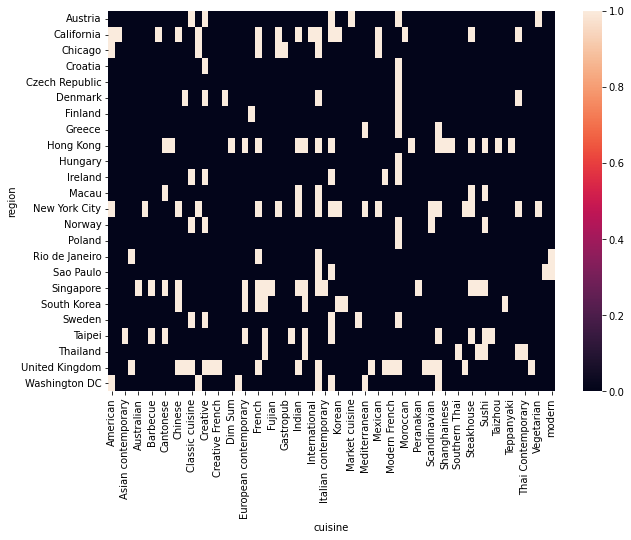

In [17]:
import seaborn as sns
ax = sns.heatmap(pivot_)

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.